In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing necessary packages
import numpy as np                             #numpy for computing
import tensorflow as tf                        #tensorflow to build the model
from tensorflow.keras.models import Sequential #Sequential is the type of the model
from tensorflow.keras.layers import Dense,Flatten      #Dense is the type of the layer
from tensorflow.keras.activations import linear, relu, sigmoid #activation functions
from tensorflow.keras.datasets import mnist
%matplotlib widget
import matplotlib.pyplot as plt
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)
# from public_tests import * 
# from autils import *
# from lab_utils_softmax import plt_softmax
# np.set_printoptions(precision=2)

2024-07-12 19:26:36.101558: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 19:26:36.114524: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 19:26:36.173363: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 19:26:37.047710: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# softmax function
def my_softmax(z):  
    #Takes an array z as input 
    N = len(z)         #Size of the array
    a = np.zeros(N)    #array to store the result
    ez_sum = 0
    for i in range(N): #This loop calulates the sum of all e^z
        ez_sum += np.exp(z[i])
    for j in range(N): #This loop calulates the indivisula 'a' values
        a[j] = np.exp(z[j]) / ez_sum
    return (a)

In [4]:
#checking softmax implementation
z = np.array([1., 2., 3., 4.])
a = my_softmax(z)
atf = tf.nn.softmax(z)
print(f"my_softmax(z):         {a}")
print(f"tensorflow softmax(z): {atf}")

my_softmax(z):         [0.0320586  0.08714432 0.23688282 0.64391426]
tensorflow softmax(z): [0.0320586  0.08714432 0.23688282 0.64391426]


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

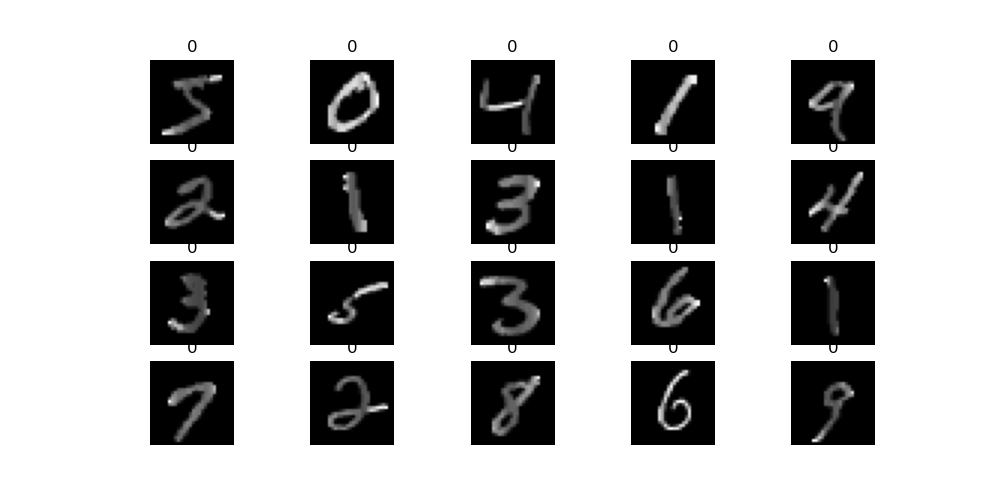

In [7]:
#Visualising the dataset
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(np.argmax(y_train[i]))
plt.show()

In [8]:
print("Shape of x_train:",np.shape(x_train))

Shape of x_train: (60000, 28, 28)


In [9]:
print("Shape of y_train:",np.shape(y_train))

Shape of y_train: (60000,)


In [10]:
#Tensorflow model
model = Sequential(
    [               
        tf.keras.Input(shape=(28,28)) , 
        Flatten(),
        Dense(25,activation='relu',name='L1'),
        Dense(15,activation='relu',name='L2'),
        Dense(10,activation='linear',name='L3')
    ], name = "my_model" 
)

In [16]:
[layer1,layer2,layer3] = model.layers

ValueError: too many values to unpack (expected 3)

In [14]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L1 (Dense)                      │ (None, 25)             │        19,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#### Examine Weights shapes
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

history = model.fit(
    x_train,y_train,
    epochs=40
)